### Es cierto, una diferencia en los accidentes automovilisticos de Monterrey y las demás ciudades de México. 

Veamos si es cierto que hay un mayo número de accidentes en Monterrey que en otra ciudad.

# EDA

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.4)
from random import sample 

In [2]:
accidentes_mexico = pd.read_csv("../data/processed/atus_anual_1997_2019.csv", index_col=False)

In [3]:
accidentes_mexico.head()

,id_entidad,id_municipio,anio,mes,id_hora,id_minuto,id_dia,diasemana,tipaccid,causaacci,caparod,sexo,aliento,cinturon,id_edad,clasacc,nom_entidad,nom_municipio
0,1,1.0,2017,1,18,30,11.0,Miércoles,Colisión con vehículo automotor,Conductor,Pavimentada,Hombre,No,Se ignora,30.0,Sólo daños,Aguascalientes,Aguascalientes
1,1,1.0,2017,1,1,50,9.0,Lunes,Colisión con motocicleta,Conductor,Pavimentada,Hombre,No,Se ignora,30.0,No fatal,Aguascalientes,Aguascalientes
2,1,1.0,2017,1,8,30,12.0,Jueves,Colisión con objeto fijo,Conductor,Pavimentada,Hombre,No,Se ignora,22.0,No fatal,Aguascalientes,Aguascalientes
3,1,1.0,2017,1,17,40,9.0,Lunes,Colisión con motocicleta,Conductor,Pavimentada,Mujer,No,Se ignora,73.0,Sólo daños,Aguascalientes,Aguascalientes
4,1,1.0,2017,1,21,10,11.0,Miércoles,Colisión con objeto fijo,Conductor,Pavimentada,Hombre,No,Se ignora,33.0,No fatal,Aguascalientes,Aguascalientes


Text(0.5, 1.0, 'Conteos de Accidentes por años')

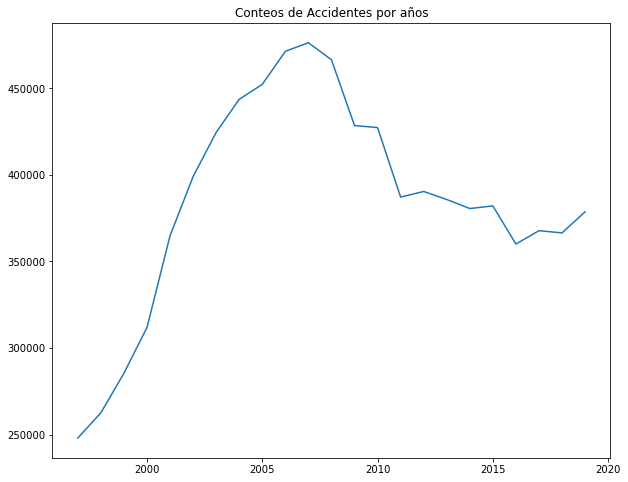

In [15]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.plot(accidentes_mexico.groupby("anio").id_entidad.count())
plt.title("Conteos de Accidentes por años")

Text(0.5, 1.0, 'Número de accidentes por entidad.')

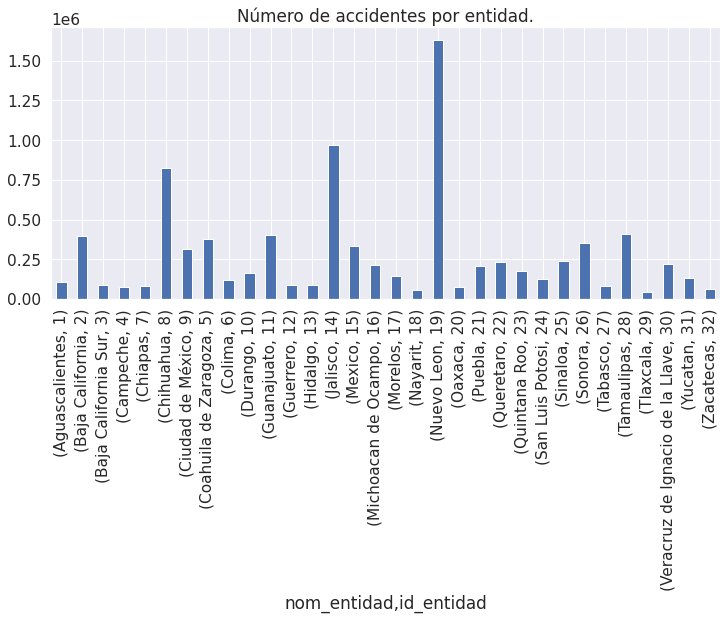

In [71]:
accidentes_mexico.groupby("nom_entidad").id_entidad.value_counts().plot(kind='bar', figsize=(12, 5), rot=0)
plt.xticks(rotation=90)
plt.title("Número de accidentes por entidad.")

Text(0.5, 1.0, 'Accidentes historicos por entidad federativa.')

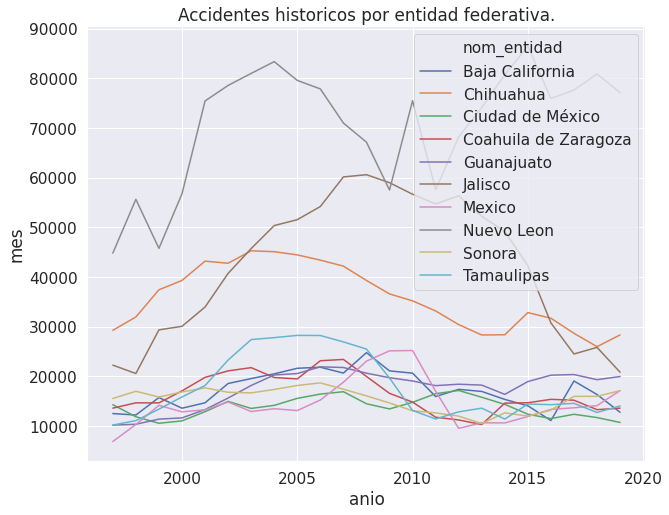

In [109]:
entidad = accidentes_mexico.groupby("nom_entidad").id_entidad.count().reset_index().sort_values("id_entidad", ascending=False)
sns.lineplot(data=accidentes_mexico[accidentes_mexico.nom_entidad.isin(entidad["nom_entidad"].tolist()[0:10])].groupby(["nom_entidad","anio"], as_index=False).mes.count(),
             x="anio", y="mes", hue="nom_entidad")
plt.title("Accidentes historicos por entidad federativa.")